In [86]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import pandas as pd
import plotly.graph_objs as go
from plotly import subplots

In [108]:
df_kghm = pd.read_csv('kgh_d.csv')
df_kghm.count()

Data          1371
Otwarcie      1371
Najwyzszy     1371
Najnizszy     1371
Zamkniecie    1371
Wolumen       1371
dtype: int64

In [109]:
df_cu = pd.read_csv('ca_c_f_d.csv')
df_cu.count()

Data          1400
Otwarcie      1400
Najwyzszy     1400
Najnizszy     1400
Zamkniecie    1400
dtype: int64

In [110]:
merged_data = pd.merge(df_cu, df_kghm, how='left', on='Data')
new_df = merged_data.ffill()
new_df.head()

,Data,Otwarcie_x,Najwyzszy_x,Najnizszy_x,Zamkniecie_x,Otwarcie_y,Najwyzszy_y,Najnizszy_y,Zamkniecie_y,Wolumen
0,2015-01-02,6309.0,6309.0,6309.0,6309.0,102.45,102.83,101.97,102.40,309987.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0,102.16,102.88,99.91,100.09,479228.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0,102.16,102.88,99.91,100.09,479228.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0,100.53,105.45,99.67,104.89,966372.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5,105.35,107.15,105.35,107.11,711805.0


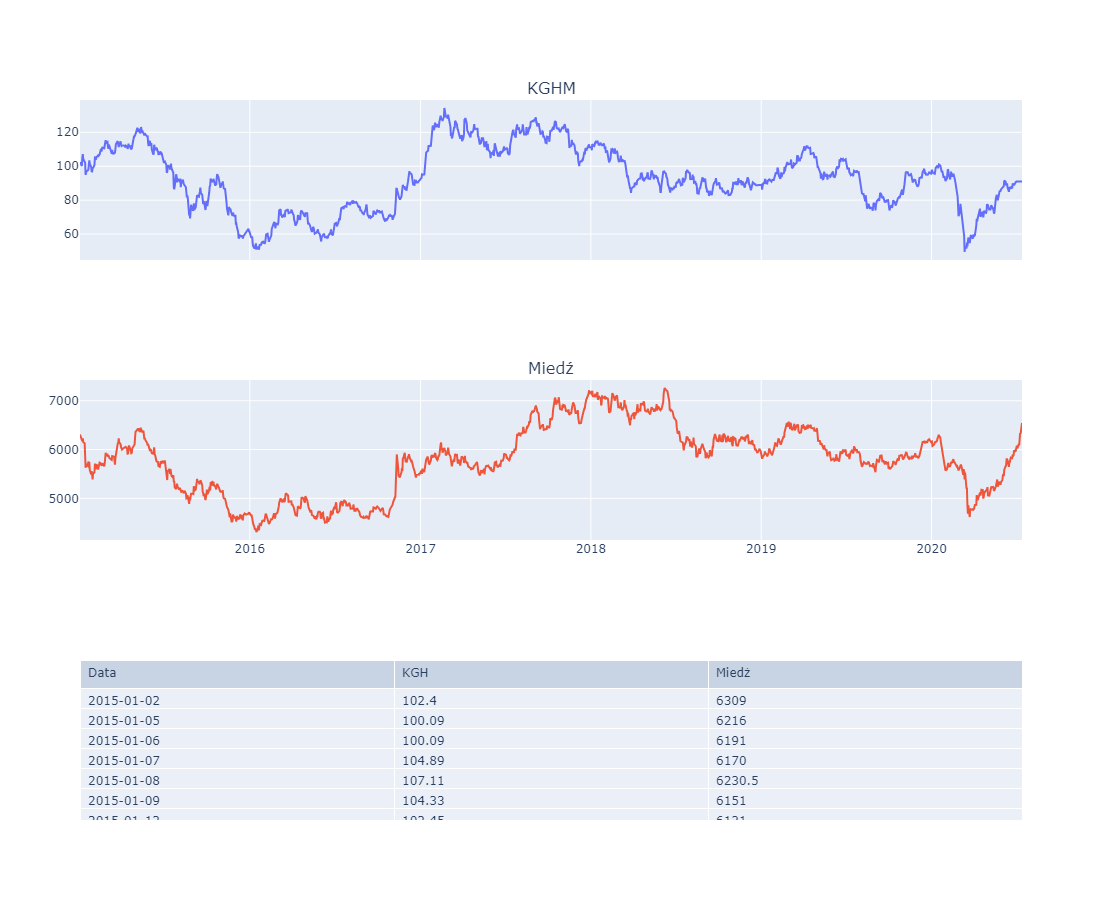

In [111]:
fig = subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('KGHM','Miedź'), 
                             specs=[[{'type': 'scatter'}],
                                    [{'type': 'scatter'}],
                                    [{'type': 'table'}]])

fig.add_trace(go.Scatter(x=new_df['Data'],y=new_df['Zamkniecie_y']),row=1, col=1)

fig.add_trace(go.Scatter(x=new_df['Data'],y=new_df['Zamkniecie_x']),row=2, col=1)

fig.add_trace(go.Table(header=dict(values=['Data', 'KGH', 'Miedż'], align='left'),
                       cells=dict(values=[new_df['Data'], new_df['Zamkniecie_y'], new_df['Zamkniecie_x']], align='left')), row=3, col=1)

fig.update_layout(height=900,showlegend=False)

iplot(fig)